# Data Analysis Sales Project

In this Project we are going to use Python, Pandas & Python Matplotlib to analyze and answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc. 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Output/all_data.csv')
data2 = data.copy()
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
data.shape

(186850, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
# Remove spaces from column names (easier to handle)
data = data.rename(columns={'Order ID': 'Order_ID', 'Quantity Ordered': 'Quantity_Ordered', 
                            'Price Each': 'Price_Each', 
                            'Order Date': 'Order_Date', 
                            'Purchase Address': 'Purchase_Address'})

In [6]:
data.Product.unique()

array(['USB-C Charging Cable', nan, 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

### Drop rows of ***NaN***

In [7]:
data.isna().sum()

Order_ID            545
Product             545
Quantity_Ordered    545
Price_Each          545
Order_Date          545
Purchase_Address    545
dtype: int64

In [8]:
df_nan = data[data.isna().any(axis = 1)]   # all rows with NaN
df_nan.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data = data.dropna(how = 'all')   # I use 'all' and not 'any' to remove rows that contain null values only. 

In [10]:
data.isna().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

### Dropping The 'Or' values in the date column

In [11]:
data['Order_Date'].str[:2].value_counts()  # 355 of 'Or' values. 

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Order_Date, dtype: int64

In [12]:
data = data[data['Order_Date'].str[:2] != 'Or']
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
data2.shape[0] - data.shape[0]   # 900 rows were deleted between null values and 'OR' values (in the Date column)

900

## 1. What was the best Month for Sales ? How much was earned this month 

### Add Day/Month/Year Columns

In [14]:
data['Day'] = data['Order_Date'].str[3:5]
data['Day'] = data['Day'].astype('int32')

data['Month'] = data['Order_Date'].str[:2]
data['Month'] = data['Month'].astype('int32')

data['Year'] = data['Order_Date'].str[6:8]
data['Year'] = data['Year'].astype('int32')

In [15]:
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Day,Month,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19,4,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",7,4,19
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,4,19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,4,19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",30,4,19


In [16]:
# replace the 2 numbers Years by 4
data.Year.unique()

array([19, 20], dtype=int32)

In [17]:
data['Year'] = data.Year.replace(19, 2019)
data['Year'] = data.Year.replace(20, 2020)

### Add Sales Column

In [18]:
# convert the two columns in interers

data['Quantity_Ordered'] = pd.to_numeric(data.Quantity_Ordered)  # make int
data['Price_Each'] = pd.to_numeric(data.Price_Each)   # make float

In [19]:
data['Sales'] = data.Quantity_Ordered * data.Price_Each

In [20]:
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Day,Month,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19,4,2019,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",7,4,2019,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",30,4,2019,11.99


### Results

In [21]:
# withdraw those of the year 2020

data_2019 = data[data.Year == 2019]
sales_2019 = data_2019.groupby(['Month']).sum()
sales_2019

,Quantity_Ordered,Price_Each,Day,Year,Sales
Month,,,,,
1,10862,1803264.98,155780,19533825,1813586.44
2,13449,2188884.72,174408,24177525,2202022.42
3,17005,2791207.83,241774,30593907,2807100.38
4,20558,3367671.02,282960,36905301,3390670.24
5,18667,3135125.13,264875,33446754,3152606.75
6,15253,2562025.61,209880,27365526,2577802.26
7,16072,2632539.56,227910,28857567,2647775.76
8,13448,2230345.42,192315,24149259,2244467.88
9,13109,2084992.09,180101,23462799,2097560.13


In [22]:
sales_2019.Sales.sort_values(ascending = False)

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1813586.44
Name: Sales, dtype: float64

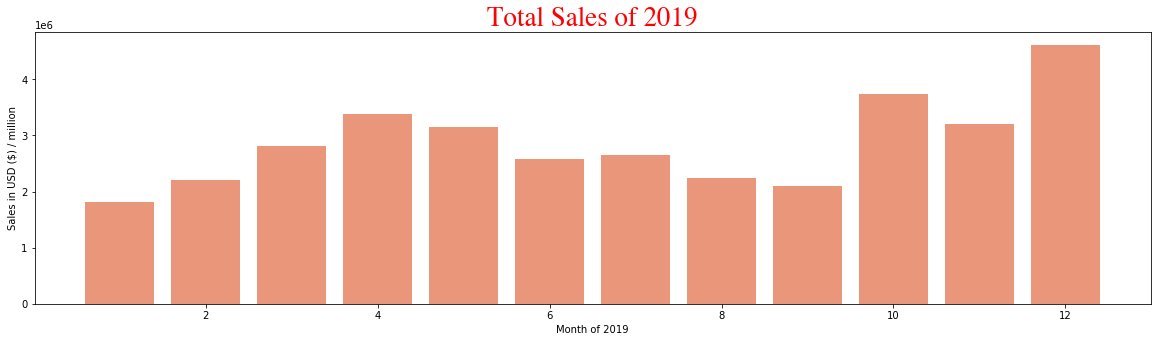

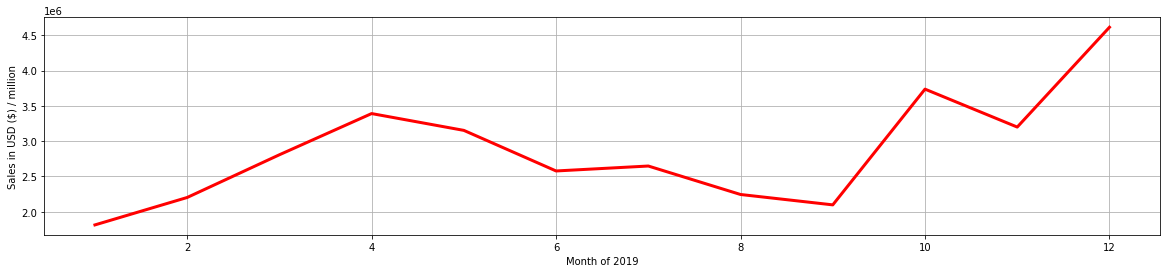

In [23]:
# plotting the results

months = range(1,13, 1)
hfont = {'fontname':'times', 'weight': 'bold'}

plt.figure(figsize = [20,5])
plt.bar(months, sales_2019['Sales'], color = 'darksalmon')
plt.xlabel('Month of 2019', size = 10)
plt.ylabel('Sales in USD ($) / million', size = 10)
plt.title('Total Sales of 2019', size = 27, color = 'red', **hfont);

plt.figure(figsize = [20,4])
plt.plot(months, sales_2019['Sales'], color = 'red', lw = 3)
plt.grid()
plt.xlabel('Month of 2019', size = 10)
plt.ylabel('Sales in USD ($) / million', size = 10);

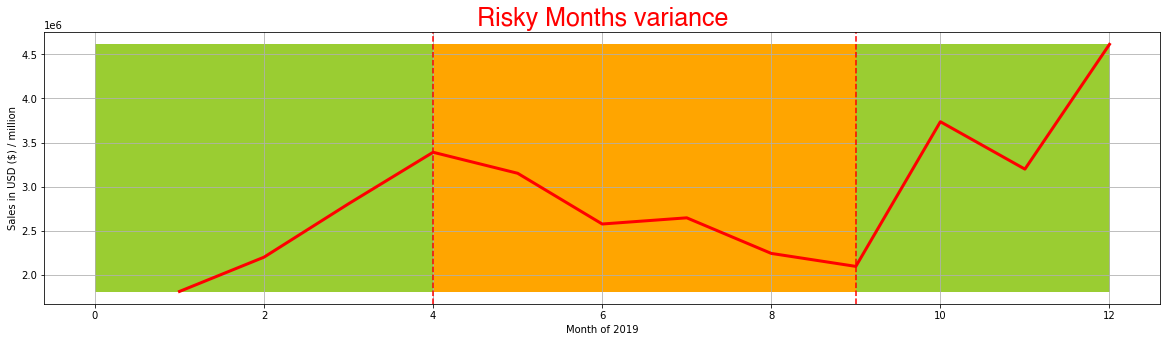

In [24]:
hfont2 = {'fontname':'helvetica', 'weight': 'bold'}

plt.figure(figsize = [20,5])
plt.plot(months, sales_2019['Sales'], color = 'red', lw = 3)
plt.grid()
plt.axvline(x = 4, ls = '--', color = 'red')
plt.axvline(x = 9, ls = '--', color = 'red')
plt.fill_betweenx(y = sales_2019['Sales'], x1 = 4, x2 = 9, color = 'orange')
plt.fill_betweenx(y = sales_2019['Sales'], x1 = 0, x2 = 4, color = 'yellowgreen')
plt.fill_betweenx(y = sales_2019['Sales'], x1 = 9, x2 = 12, color = 'yellowgreen')
plt.xlabel('Month of 2019', size = 10)
plt.ylabel('Sales in USD ($) / million', size = 10)
plt.title('Risky Months variance', size = 25, color = 'red', **hfont2);

### Conclusion

The best month of the year 2019 was the month of December with a total sales of 4 million dollars . While the worst month was January with 1.8 millions dollars of sales.  

To go a little further, we can also see that there is a clear regression from April to September. Then a significant increase until December. We can see that the month of January just after (January 2020) suffered a colossal fall (similar to the previous year) Try to understand the reason.

## 2. What city has the highest number of Sales ? 

In [25]:
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Day,Month,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19,4,2019,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",7,4,2019,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",30,4,2019,11.99


### Add a city column

In [26]:
# using apply()

data['city'] = data.Purchase_Address.apply(lambda x : x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1]) # between the two points
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Day,Month,Year,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19,4,2019,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",7,4,2019,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",30,4,2019,11.99,Los Angeles CA


In [27]:
data.city.unique()

array([' Dallas TX', ' Boston MA', ' Los Angeles CA', ' San Francisco CA',
       ' Seattle WA', ' Atlanta GA', ' New York City NY', ' Portland OR',
       ' Austin TX', ' Portland ME'], dtype=object)

In [28]:
city_sales = data.groupby('city')['Sales'].sum().sort_values(ascending = False).reset_index()
city_sales

,city,Sales
0,San Francisco CA,8262203.91
1,Los Angeles CA,5452570.80
2,New York City NY,4664317.43
3,Boston MA,3661642.01
4,Atlanta GA,2795498.58
5,Dallas TX,2767975.40
6,Seattle WA,2747755.48
7,Portland OR,1870732.34
8,Austin TX,1819581.75
9,Portland ME,449758.27


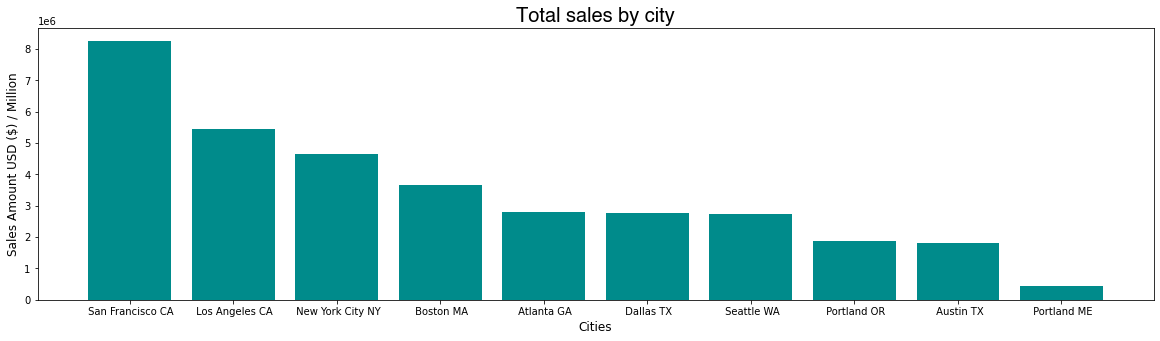

In [29]:
plt.figure(figsize=[20,5])
plt.bar(x = city_sales.city, height = city_sales.Sales, color = 'darkcyan')
plt.xlabel('Cities', size = 12)
plt.ylabel('Sales Amount USD ($) / Million', size = 12)
plt.title('Total sales by city', size = 20,  **hfont2);

### Conclusion

We can easily observe that our most numerous sales are in San Francisco followed by Los Angles and New York (by far). The city with the least total sales is Portland ME. Note that Portland OR is also another part of the city of Portland where the total sales are not very important **(compared to other cities in the country)**.

## 3. What time should we display advertisements to maximise likelihood of customer buying product ?

In [30]:
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Day,Month,Year,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19,4,2019,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",7,4,2019,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",30,4,2019,11.99,Los Angeles CA


In [31]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

In [32]:
data['Hour_Order'] = data.Order_Date.dt.hour 

In [33]:
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Day,Month,Year,Sales,city,Hour_Order
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",7,4,2019,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",30,4,2019,11.99,Los Angeles CA,9


In [34]:
df_hour = data['Hour_Order'].value_counts().sort_index(ascending = True).reset_index()
df_hour.head()

,index,Hour_Order
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854


In [35]:
df_hour = df_hour.rename(columns = {'index' : 'Hour'})  # column rename
df_hour = df_hour.rename(columns = {'Hour_Order' : 'Count_order'})

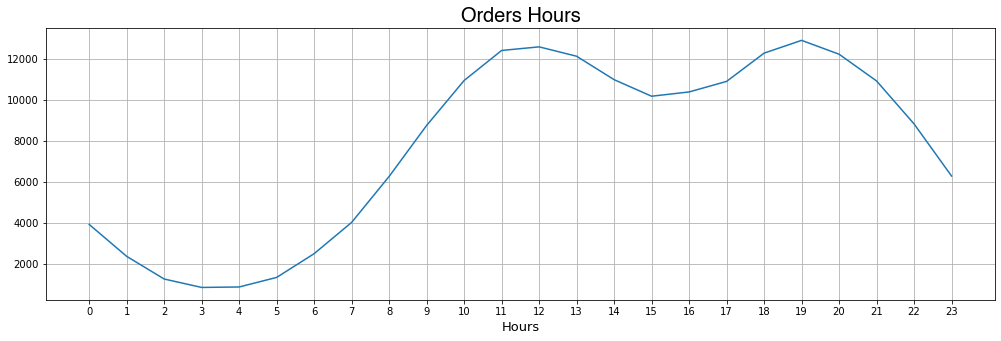

In [36]:
plt.figure(figsize=[17,5])
plt.grid()
plt.title('Orders Hours', size = 20, **hfont2)
plt.xlabel('Hours', size = 13)
plt.xticks(np.arange(min(df_hour.Hour), max(df_hour.Hour) + 1, 1))
plt.plot(df_hour.Hour, df_hour.Count_order);

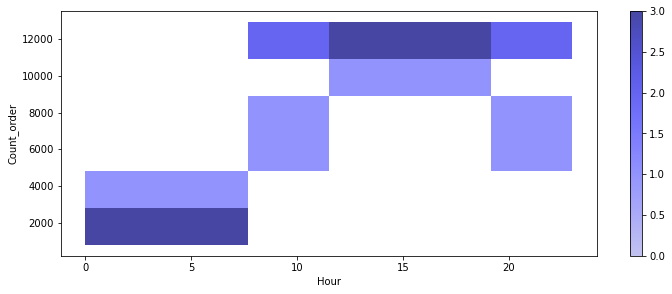

In [37]:
plt.figure(figsize=[12,4.5])
sns.histplot(x = 'Hour', y = 'Count_order', data = df_hour, cbar= True, color = 'blue');

**Conclusion :** My recommendation would be to insert the advertisements is around 11am and 7pm (19). To be wider between 10:30 am and 1pm (13) as well 6-7 pm (18-19)

## 4. What products are more often sold together

It's a question that gave me a lot of trouble and especially a lot of research to arrive at what I think is the best answer.

In [67]:
order_id_duplicated = data[data['Order_ID'].duplicated(keep= False)]
order_id_duplicated.head(4)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Day,Month,Year,Sales,city,Hour_Order
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,11.99,Los Angeles CA,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",3,4,2019,600.00,Los Angeles CA,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",3,4,2019,11.95,Los Angeles CA,19


In [40]:
order_id_duplicated.shape

(14649, 12)

In [41]:
order_id_duplicated['Product_grouped'] = order_id_duplicated.groupby('Order_ID')['Product'].transform(lambda x : ','.join(x))

In [66]:
order_id_duplicated.head(4)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Day,Month,Year,Sales,city,Hour_Order,Product_grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,600.00,Los Angeles CA,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,11.99,Los Angeles CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",3,4,2019,600.00,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",3,4,2019,11.95,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"


In [58]:
df_grouped = order_id_duplicated.drop_duplicates(subset='Order_ID', keep ='first')

In [60]:
df_grouped = df_grouped[['Order_ID', 'Product_grouped']]

In [126]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_grouped['Product_grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

**Conclusion :** We can find out that the Iphone and the 'Lightning Charging Cable' are the two best-selling items together. Closely followed by the 'Google Phone' and the 'USB-C Charging Cable'.

## 5. What Product sold the most ? 

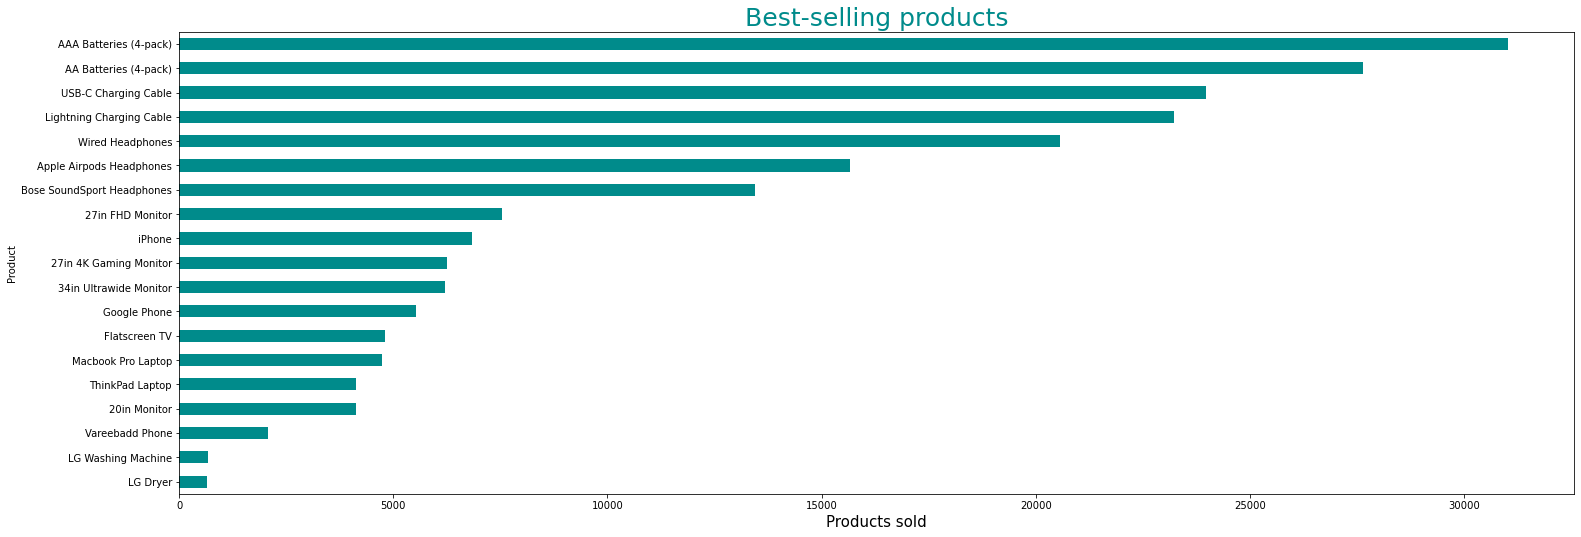

In [115]:
plt.figure(figsize=[25,8.5])
data.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(color = 'darkcyan')
plt.title('Best-selling products', size = 25, color = 'darkcyan')
plt.xlabel('Products sold', size = 15);

In [124]:
prices = data.groupby('Product')['Price_Each'].mean().sort_values().reset_index()
prices.head()

,Product,Price_Each
0,AAA Batteries (4-pack),2.99
1,AA Batteries (4-pack),3.84
2,USB-C Charging Cable,11.95
3,Wired Headphones,11.99
4,Lightning Charging Cable,14.95
